In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sn
plt.style.use("seaborn")
%matplotlib widget
%matplotlib inline
import ipympl

In [3]:
bikes=pd.read_csv("train.csv",header=0, index_col="datetime", parse_dates=True)
X=bikes.drop("count", axis=1)
y=bikes["count"]
X_train,X_test,y_train, y_test=train_test_split(X,y,random_state=43)
X_train.shape, y_train.shape

((8164, 10), (8164,))

Reading in data

In [4]:
X_train["count"]=X_train["registered"]+ X_train["casual"]
X_train["hour"]=X_train.index.hour
X_train.head()


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour
datetime,,,,,,,,,,,,
2011-09-19 12:00:00,3,0,1,2,23.78,27.275,60,6.0032,51,138,189,12
2012-06-10 07:00:00,2,0,0,1,24.60,28.790,78,7.0015,21,41,62,7
2012-10-01 11:00:00,4,0,1,1,23.78,27.275,46,0.0000,76,196,272,11
2011-12-05 02:00:00,4,0,1,1,13.12,17.425,87,0.0000,0,8,8,2
2011-03-16 03:00:00,1,0,1,2,11.48,13.635,100,15.0013,1,2,3,3


In [5]:
%matplotlib widget
X_train.resample("W")["registered","casual"].sum().plot()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

The bike rentals seem to peek between July and October. They seem to follow a *seasonal trend*.

In [6]:
ax=X_train.resample("D")["casual","registered","count"].sum().rolling(91).sum().plot()
ax.set_ylim(0, None)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

(0.0, 302302.5)

**The registerd users** seem to follow a commute cycle: with a peak in the morning and a peak in the afternoon.

**The casual users** do not follow that patter. They ony peek once, mid day (tourist or maybe vacation ridee, or holiday rides).

**The shape of the total counts** follows perfectly the shape of the registred users, howvere it is shifted in the mid day by the casual users.

In [7]:
ax=X_train.groupby(X_train.index.time)["casual","registered","count"].mean().plot()
ax.set_ylim(0,None)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

(0.0, 493.16715147027713)

In [9]:
pivoted=X_train.pivot_table("count",index=X_train.index.time,columns=X_train.index.date)
pivoted.head()

,2011-01-01,2011-01-02,2011-01-03,2011-01-04,2011-01-05,2011-01-06,2011-01-07,2011-01-08,2011-01-09,2011-01-10,...,2012-12-10,2012-12-11,2012-12-12,2012-12-13,2012-12-14,2012-12-15,2012-12-16,2012-12-17,2012-12-18,2012-12-19
00:00:00,16.0,NaN,5.0,5.0,NaN,11.0,17.0,25.0,25.0,5.0,...,20.0,NaN,34.0,32.0,NaN,94.0,110.0,28.0,18.0,41.0
01:00:00,NaN,17.0,2.0,2.0,6.0,4.0,7.0,16.0,12.0,1.0,...,4.0,8.0,NaN,23.0,26.0,95.0,96.0,15.0,NaN,15.0
02:00:00,NaN,9.0,NaN,1.0,NaN,2.0,1.0,16.0,11.0,NaN,...,5.0,1.0,9.0,8.0,NaN,69.0,87.0,NaN,7.0,3.0
03:00:00,NaN,6.0,NaN,NaN,NaN,NaN,NaN,7.0,4.0,1.0,...,4.0,3.0,10.0,2.0,NaN,23.0,38.0,3.0,5.0,5.0
04:00:00,NaN,NaN,1.0,NaN,NaN,1.0,1.0,1.0,1.0,3.0,...,12.0,8.0,NaN,8.0,NaN,6.0,11.0,5.0,NaN,7.0


What we see is that we have days of the week in which we have a bimodal peek. The rest of the days seem to be holidays and peek only once,
in the middle of the day. 

In [10]:
pivoted.plot(legend=False, alpha=0.05)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [11]:
df_tem=X_train.groupby([pd.Grouper(freq="M")])["count", "atemp","windspeed","humidity","weather"].mean()
sn.pairplot(df_tem)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

**Remarks on weather**:

- we have a big imbalance in the data due to "logging" of the data: basically days with 0 rides have not been logged 
- this could lead to an inability to predict low demand days correctly (because of sample bias)

In [15]:
X_train.groupby("weather")["casual","registered"].sum().plot.bar()


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Diffrence between casual and registered users depending on weather

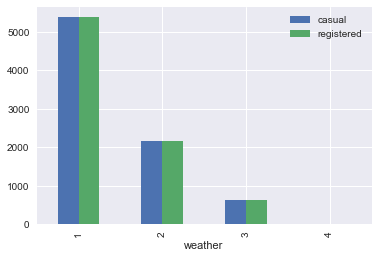

In [92]:
X_train.groupby("weather")["casual","registered"].count().plot.bar()

**Temperature**:

Let's also look at the descriptive statistics for the temperature (maybe we aalso have a bias towards a higher temperature)

In [126]:
X_train.atemp.describe() ### there is a good distribution of temperature

count    8164.000000
mean       23.561036
std         8.504985
min         0.760000
25%        16.665000
50%        24.240000
75%        31.060000
max        44.695000
Name: atemp, dtype: float64

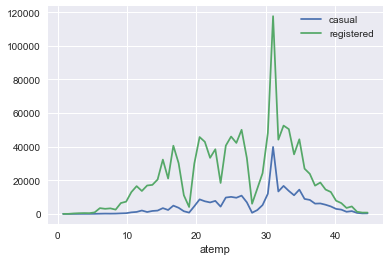

In [128]:
X_train.groupby("atemp")["casual","registered"].sum().plot()

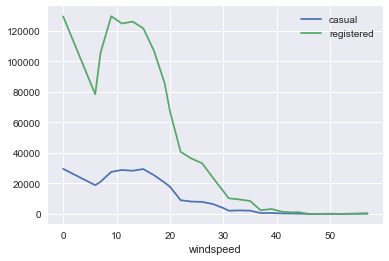

In [129]:
X_train.groupby("windspeed")["casual","registered"].sum().plot()


**Season**:

It doesn't seem to be a big imbalance in the sampling of the seasons

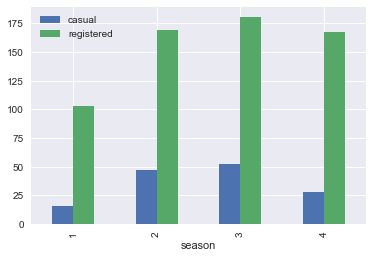

In [101]:
X_train.groupby("season")["casual","registered"].mean().plot.bar()

**Holidays**:

We observe that holiday rentals peek during lucnh hour times and in later hours of the day (after 20:00).

In non holiday days we observe a bimodal distribution of the rentals as we have seen above.

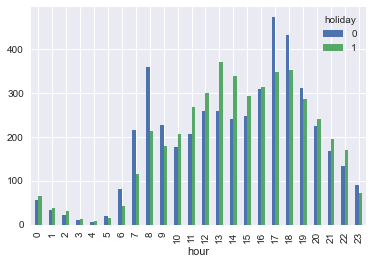

In [134]:
df_2=X_train.groupby(["hour","holiday"])["count"].mean().unstack().plot.bar()


**Holidays**:

During **holidays** the casual bike renting increases, as expected.

Whereas, the registerd users just follow a diffrnet pattern and they increse their rentals in the noon time, rather thn in the afternoon or morning.

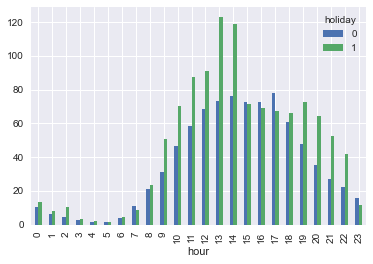

In [137]:
X_train.groupby(["hour","holiday"])["casual"].mean().unstack().plot.bar()

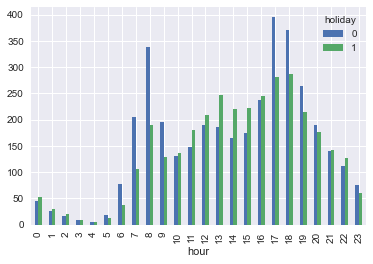

In [139]:
X_train.groupby(["hour","holiday"])["registered"].mean().unstack().plot.bar()

**Working days**:

- usually on working days bike rentals are higher and follow this coomute distribution
- on non workig days, the pattern of rentals is similar to that of casual riders and of hoidays

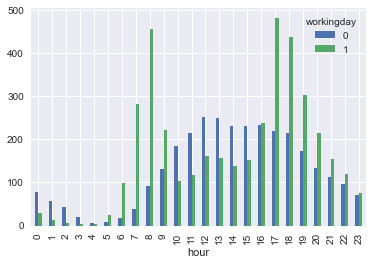

In [142]:
X_train.groupby(["hour","workingday"])["registered"].mean().unstack().plot.bar()

People rent alsmost double so many bikes during a working day than during a non working day. whch is expected.

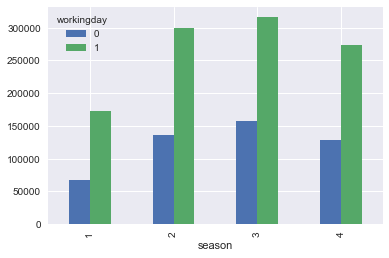

In [154]:
X_train.groupby(["season","workingday"])["count"].sum().unstack().plot.bar()

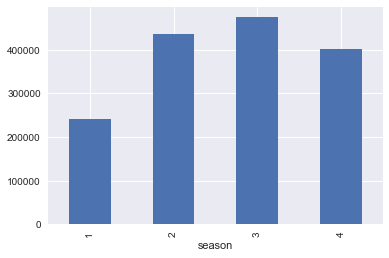

In [157]:
X_train.groupby(["season"])["count"].agg("sum").plot.bar()

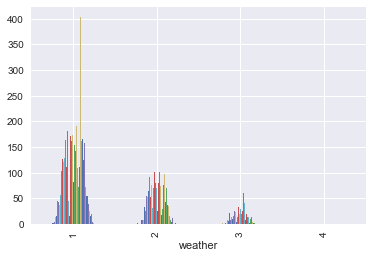

In [171]:
X_train.groupby(["weather", "atemp"])["count"].agg("count").unstack().plot.bar(legend=False)

**Bias**:

- we again observe a bias towards "nice" weather
- what is intresting is that for al whether types (except type 4), we see that average felt temperature is around 30 Celsius
- so even in "bad" weather we have high temperatures (at leat when people are renting bikes)

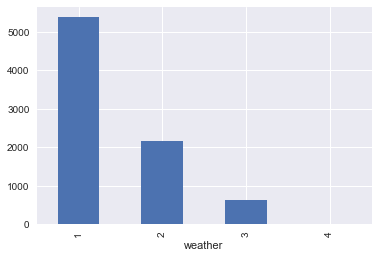

In [172]:
X_train.groupby(["weather"])["atemp"].agg("count").plot.bar(legend=False)

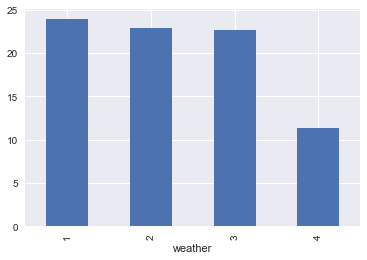

In [173]:
X_train.groupby(["weather"])["atemp"].agg("mean").plot.bar(legend=False)

- Mean temperature is higher on non worling days than on working days
- on non wirking days we have higher bike rentals for good weather conditions, but this is reveresed for working days
- holidays are nt so dependdent on weather conditions (as long as weather cndition is 1 or 2)

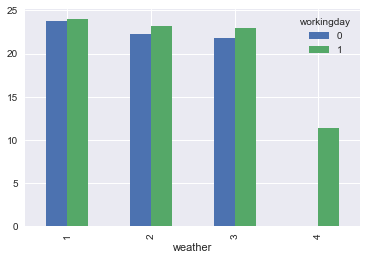

In [289]:
X_train.groupby(["weather","workingday"])["atemp"].agg("mean").unstack().plot.bar()

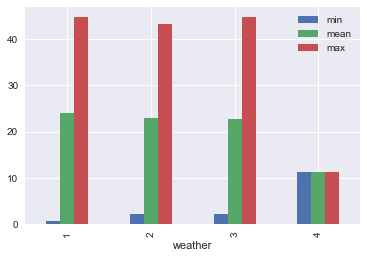

In [293]:
X_train.groupby(["weather"])["atemp"].agg(["min","mean","max"]).plot.bar()

Normal distribution of the felt temperature with respect to the numner of bikes rented out. whch is only set in the positive realm.

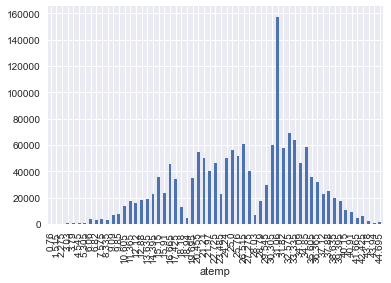

In [303]:
X_train.groupby(["atemp"])["count"].sum().plot.bar()

We have a log normal distribution of the windspeed.

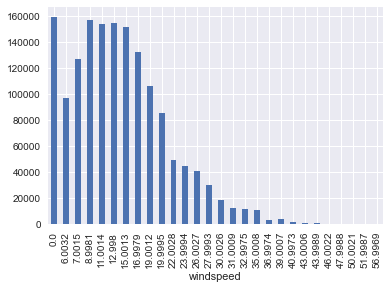

In [304]:
X_train.groupby(["windspeed"])["count"].sum().plot.bar()

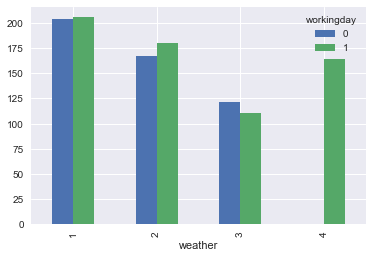

In [200]:
X_train.groupby(["weather","workingday"])["count"].agg("mean").unstack().plot.bar()

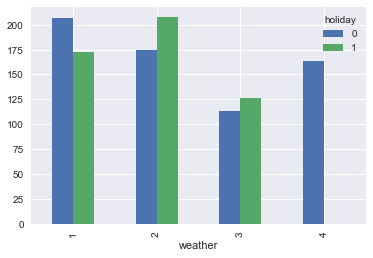

In [202]:
X_train.groupby(["weather","holiday"])["count"].agg("mean").unstack().plot.bar() ## it could be that we had more holidays with medium weather than with nice, during 2011, 2012

Remarks:

- we do not log days which do not have any bike riders, 
- neither do we log weather conditons 

In [175]:
X_train["count"].describe() 

count    8164.000000
mean      190.372856
std       179.182238
min         1.000000
25%        43.000000
50%       146.000000
75%       282.000000
max       977.000000
Name: count, dtype: float64

In [177]:
X_train.groupby("weather")["count"].describe() 

,count,mean,std,min,25%,50%,75%,max
weather,,,,,,,,
1,5375.0,205.334884,187.085038,1.0,48.50,162.0,305.0,977.0
2,2150.0,175.727907,165.604632,1.0,40.25,133.0,262.0,868.0
3,638.0,113.714734,123.010357,1.0,24.00,73.0,160.0,755.0
4,1.0,164.000000,NaN,164.0,164.00,164.0,164.0,164.0


** So what we observe is that we have bike rentals in winter but only for good weather**

In [178]:
X_train.groupby(["weather", "season"])["count"].describe() 

count        mean         std    min     25%    50%     75%  \
weather season                                                                 
1       1       1326.0  130.211916  136.586823    1.0   31.00   91.0  180.00   
        2       1334.0  239.029235  203.550856    1.0   60.25  200.0  360.00   
        3       1447.0  241.939185  199.564801    1.0   74.50  207.0  353.00   
        4       1268.0  206.674290  176.830221    1.0   55.75  175.0  308.25   
2       1        556.0  103.805755  110.444255    1.0   20.00   71.5  151.00   
        2        526.0  187.269962  168.632470    1.0   48.50  151.5  266.75   
        3        444.0  229.740991  183.431052    2.0   73.75  199.0  343.50   
        4        624.0  191.650641  169.654468    1.0   45.25  157.5  286.25   
3       1        161.0   65.447205   90.320118    1.0    8.00   36.0   76.00   
        2        156.0  119.993590  132.391136    1.0   24.00   74.0  168.75   
        3        151.0  149.304636  136.500793    2.0   45.50  121.0  194.00   
        4        170.0  122.052941  115.066704    2.0   41.50   92.0  171.75   
4       1          1.0  164.000000         NaN  164.0  164.00  164.0  164.00   

                  max  
weather season         
1       1       801.0  
        2       873.0  
        3       977.0  
        4       943.0  
2       1       712.0  
        2       831.0  
        3       868.0  
        4       817.0  
3       1       520.0  
        2       627.0  
        3       755.0  
        4       689.0  
4       1       164.0

**Correlation matrix**

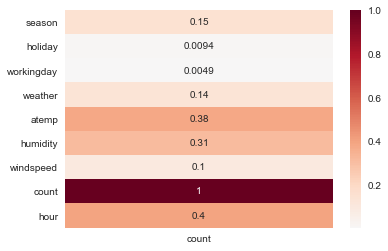

In [215]:
df=X_train.drop(["casual","registered"], axis=1)
sn.heatmap(abs(df.corr()[["count"]]),cmap="RdBu_r",center=0.0, annot=True)

In [205]:
X_train.groupby(["season","weather"])["count","atemp"].describe()

count                                                        \
                 count        mean         std    min     25%    50%     75%   
season weather                                                                 
1      1        1326.0  130.211916  136.586823    1.0   31.00   91.0  180.00   
       2         556.0  103.805755  110.444255    1.0   20.00   71.5  151.00   
       3         161.0   65.447205   90.320118    1.0    8.00   36.0   76.00   
       4           1.0  164.000000         NaN  164.0  164.00  164.0  164.00   
2      1        1334.0  239.029235  203.550856    1.0   60.25  200.0  360.00   
       2         526.0  187.269962  168.632470    1.0   48.50  151.5  266.75   
       3         156.0  119.993590  132.391136    1.0   24.00   74.0  168.75   
3      1        1447.0  241.939185  199.564801    1.0   74.50  207.0  353.00   
       2         444.0  229.740991  183.431052    2.0   73.75  199.0  343.50   
       3         151.0  149.304636  136.500793    2.0   45.50  121.0  194.00   
4      1        1268.0  206.674290  176.830221    1.0   55.75  175.0  308.25   
       2         624.0  191.650641  169.654468    1.0   45.25  157.5  286.25   
       3         170.0  122.052941  115.066704    2.0   41.50   92.0  171.75   

                        atemp                                               \
                  max   count       mean       std     min     25%     50%   
season weather                                                               
1      1        801.0  1326.0  15.112541  6.526954   0.760  10.605  14.395   
       2        712.0   556.0  15.554613  5.478308   2.275  11.365  15.150   
       3        520.0   161.0  14.982081  4.827449   2.275  11.365  14.395   
       4        164.0     1.0  11.365000       NaN  11.365  11.365  11.365   
2      1        873.0  1334.0  27.097256  5.576064  12.120  23.485  26.515   
       2        831.0   526.0  26.330789  5.291838  11.365  23.485  25.760   
       3        627.0   156.0  24.446378  4.880980  11.365  21.970  25.000   
3      1        977.0  1447.0  32.993421  4.645587  12.120  30.305  33.335   
       2        868.0   444.0  31.781284  4.281597  12.120  29.545  31.820   
       3        755.0   151.0  29.978212  4.339778  12.120  27.275  28.790   
4      1        943.0  1268.0  19.492224  5.413471   7.575  15.150  19.695   
       2        817.0   624.0  20.253902  4.937557   9.090  16.665  20.455   
       3        689.0   170.0  21.742353  4.114720  10.605  18.180  21.970   

                                
                   75%     max  
season weather                  
1      1        20.455  32.575  
       2        19.885  32.575  
       3        18.180  26.515  
       4        11.365  11.365  
2      1        31.060  43.940  
       2        31.060  40.150  
       3        27.275  39.395  
3      1        35.605  44.695  
       2        34.850  43.180  
       3        33.335  44.695  
4      1        22.725  33.335  
       2        24.240  34.090  
       3        25.760  30.305

In [212]:
X_train["temp"]=pd.cut(X_train["atemp"],bins=3, labels=["low","medium","high"])

In [213]:
X_train.groupby("temp")["count"].count()

temp
low       1774
medium    3970
high      2420
Name: count, dtype: int64

In [236]:
one_hot_temp=pd.get_dummies(X_train["temp"])
df=pd.concat([df,one_hot_temp],axis=1)

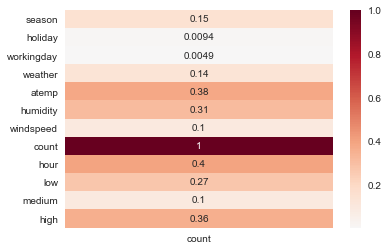

In [238]:

sn.heatmap(abs(df.corr()[["count"]]),cmap="RdBu_r",center=0.0, annot=True)

In [231]:
X_train["weather_cond"]=pd.cut(X_train["weather"],bins=2, labels=["good","bad"])

In [239]:

one_hot_weather=pd.get_dummies(X_train["weather_cond"])
df=pd.concat([df,one_hot_weather],axis=1)

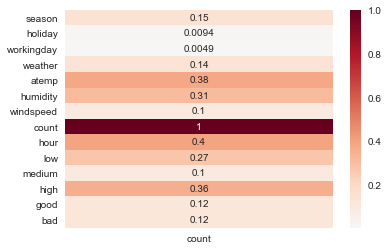

In [240]:

sn.heatmap(abs(df.corr()[["count"]]),cmap="RdBu_r",center=0.0, annot=True)

We have a too small sample for "bad weather conditions"

Also we have an undersamplig robem with lower range temperatures

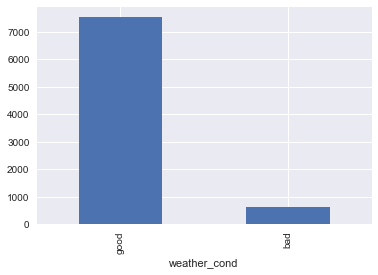

In [245]:
X_train.groupby(["weather_cond"])["count"].count().plot.bar()

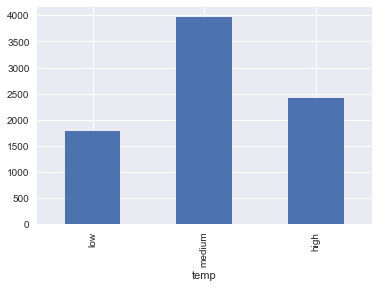

In [246]:
X_train.groupby(["temp"])["count"].count().plot.bar()

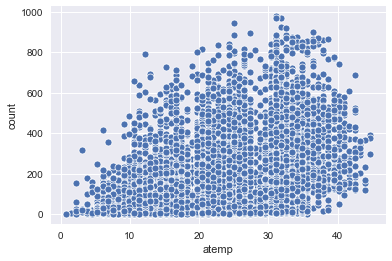

In [287]:
sn.scatterplot(x="atemp",y="count",data=X_train)

In [277]:
X_train["hour"].unique()

array([12,  7, 11,  2,  3,  9, 13, 22, 23,  4, 20, 17, 18, 19,  0,  6, 16,
       15, 10,  1,  8, 21, 14,  5], dtype=int64)

In [274]:
X_train["peek_hours"]=[1 if x in [7,8,9,17,18,19] else 0 for x in X_train["hour"]]

In [279]:
X_train["month"]=X_train.index.month

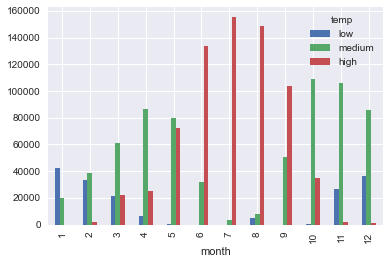

In [284]:
X_train.groupby(["month","temp"])["count"].sum().unstack().plot.bar()

Let's create some nteraction terms and then see the correlation with the pedicted varaible

In [343]:
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,hour,low,medium,high,good,bad,atemp^2,humidity^2,peek_hours,month
datetime,,,,,,,,,,,,,,,,,,,
2011-09-19 12:00:00,3,0,1,2,medium,27.275,60,6.0032,189,12,0,1,0,1,0,743.925625,3600,0,9
2012-06-10 07:00:00,2,0,0,1,medium,28.790,78,7.0015,62,7,0,1,0,1,0,828.864100,6084,1,6
2012-10-01 11:00:00,4,0,1,1,medium,27.275,46,0.0000,272,11,0,1,0,1,0,743.925625,2116,0,10
2011-12-05 02:00:00,4,0,1,1,medium,17.425,87,0.0000,8,2,0,1,0,1,0,303.630625,7569,0,12
2011-03-16 03:00:00,1,0,1,2,low,13.635,100,15.0013,3,3,1,0,0,1,0,185.913225,10000,0,3


In [341]:
from sklearn.preprocessing import PolynomialFeatures

In [352]:
poly=PolynomialFeatures(degree=2, include_bias=False, interaction_only=True)
df["inter_work_wind"]=poly.fit_transform(X_train[["workingday","windspeed"]])[:,2]
df["inter_work_hour"]=poly.fit_transform(X_train[["workingday","hour"]])[:,2]
df["inter_weather_month"]=poly.fit_transform(X_train[["weather","month"]])[:,2]
df["inter_humidity_atemp"]=poly.fit_transform(X_train[["humidity","atemp"]])[:,2]


In [338]:

df=pd.concat([df,X_train[["peek_hours","month"]]],axis=1)
df["atemp^2"]=df["atemp"]**2
df["humidity^2"]=df["humidity"]**2

In [353]:
df.head()


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,hour,...,good,bad,atemp^2,humidity^2,peek_hours,month,inter_work_wind,inter_work_hour,inter_weather_month,inter_humidity_atemp
datetime,,,,,,,,,,,,,,,,,,,,,
2011-09-19 12:00:00,3,0,1,2,medium,27.275,60,6.0032,189,12,...,1,0,743.925625,3600,0,9,6.0032,12.0,18.0,1636.500
2012-06-10 07:00:00,2,0,0,1,medium,28.790,78,7.0015,62,7,...,1,0,828.864100,6084,1,6,0.0000,0.0,6.0,2245.620
2012-10-01 11:00:00,4,0,1,1,medium,27.275,46,0.0000,272,11,...,1,0,743.925625,2116,0,10,0.0000,11.0,10.0,1254.650
2011-12-05 02:00:00,4,0,1,1,medium,17.425,87,0.0000,8,2,...,1,0,303.630625,7569,0,12,0.0000,2.0,12.0,1515.975
2011-03-16 03:00:00,1,0,1,2,low,13.635,100,15.0013,3,3,...,1,0,185.913225,10000,0,3,15.0013,3.0,6.0,1363.500


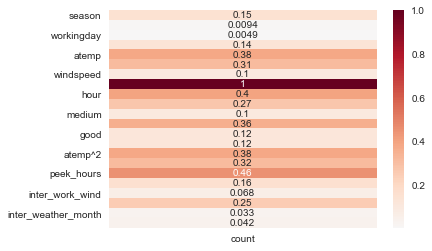

In [354]:

sn.heatmap(abs(df.corr()[["count"]]),cmap="RdBu_r",center=0.0, annot=True)

In [355]:
df.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'count', 'hour', 'low', 'medium', 'high',
       'good', 'bad', 'atemp^2', 'humidity^2', 'peek_hours', 'month',
       'inter_work_wind', 'inter_work_hour', 'inter_weather_month',
       'inter_humidity_atemp'],
      dtype='object')

Based on the correlation plot we would need to exckude the following varaibles:

- interction humidity atemp has no effect

- interaction weather and month has no effect

- intercation work wind has also no effect

- workingday and holiday seem to have very little effect

- we can exclude weather because its correlated with weather conditions (good, bad)

- also we can exclude temp because its correlated with atemp

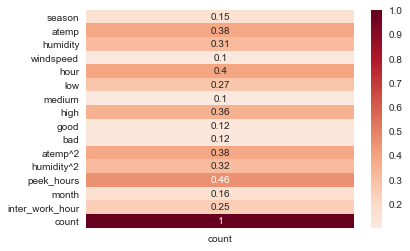

In [356]:
sub=["season","atemp","humidity","windspeed","hour","low","medium","high","good","bad","atemp^2", "humidity^2","peek_hours","month","inter_work_hour","count"]
sn.heatmap(abs(df[sub].corr()[["count"]]),cmap="RdBu_r",center=0.0, annot=True)